In [4]:
import networkx as nx

print(type(nx))

<class 'module'>


In [1]:
from neo4j import GraphDatabase
import networkx as nx

driver = GraphDatabase.driver('bolt://localhost:7687', auth=('neo4j', 'Alskdjfh6'))
Di = nx.DiGraph()

def create_edge(node_edge):
    Di.add_edges_from(node_edge)
    
def get_RolesAttachedLambda(tx):
    query = '''MATCH (r:IAMRole)-[]->(f:AWSLambda)
RETURN r.iam_role_name, f.lambda_function_name
    '''
# RETURN r, f
    node_edge = []
    for record in tx.run(query):
        print(type(record))
        print(record)
        edge_data = (record['r.iam_role_name'], record['f.lambda_function_name'])
        node_edge.append(edge_data)
    
    create_edge(node_edge)
        
        # for obj in list(record):
        #     print(type(obj))
        #     print(obj)
        #     print(obj.iam_role_name)


with driver.session() as session:
    session.read_transaction(get_RolesAttachedLambda)


<class 'neo4j.data.Record'>
<Record r.iam_role_name='cloud9-LambdaForALB-LambdaForALBRole-1TMV4PS1I8POY' f.lambda_function_name='cloud9-LambdaForALB-LambdaForALB-1PAGDDI15LCIT'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='CUR_CrawlerLambdaRole' f.lambda_function_name='cur-crawler-AWSCURInitializer-E4LAA1W87KJM'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='CUR_PutConfigLambdaRole' f.lambda_function_name='cur-crawler-AWSS3CURNotification-F664YEWLLOP'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='fitbit-clock-role-h0g0mrl2' f.lambda_function_name='fitbit-clock'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='hello-py-role-kwkmd9n6' f.lambda_function_name='hello-py'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='lambda_rename-move_on-s3' f.lambda_function_name='rename-move_on-s3'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='lambda_test' f.lambda_function_name='image_reko-to-cv2'>
<class 'neo4j.data.Record'>
<Record r.iam_role_name='lambda_tes

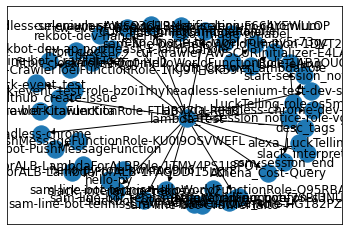

In [2]:
#https://networkx.org/documentation/stable/tutorial.html#drawing-graphs
nx.draw_networkx(Di)

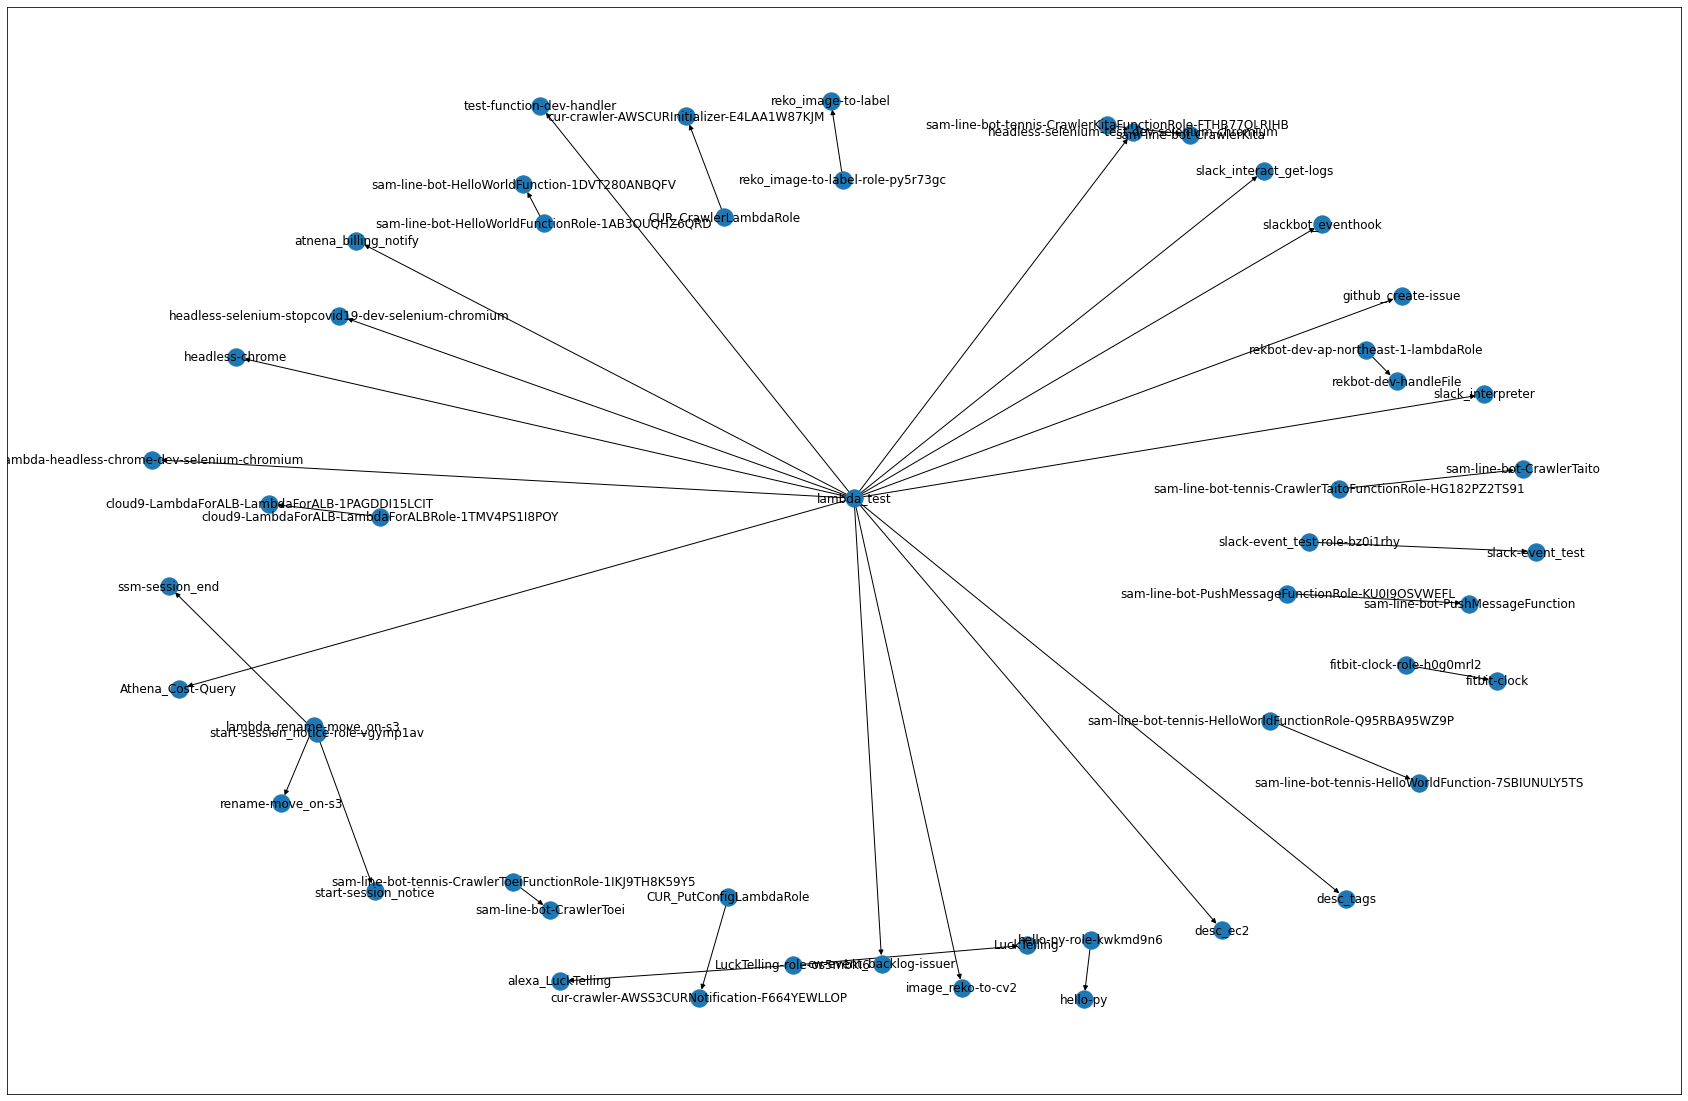

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))

pos = nx.spring_layout(Di, k=0.2)
nx.draw_networkx(Di, pos)